In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('PracticeDataset.xlsx')
df.head()

,ID,Series,Hours,Run,Cup,Batch,Length,Weight,Temperature,Larvalstage
0,1,1,0,1,1,1,0.20,0.0005,1,1
1,2,1,0,1,2,2,0.20,0.0005,1,1
2,3,1,0,1,3,3,0.21,0.0005,1,1
3,4,1,0,1,4,4,0.22,0.0005,1,1
4,5,1,0,1,5,5,0.23,0.0005,1,1


In [4]:
df.shape

(700, 10)

In [5]:
df['Temperature'] = df['Temperature'].replace(1,25)
df['Temperature'] = df['Temperature'].replace(2,20)
df['Temperature'] = df['Temperature'].replace(3,15)

In [6]:
df.tail()

,ID,Series,Hours,Run,Cup,Batch,Length,Weight,Temperature,Larvalstage
695,696,31,240,2,8,1,1.75,0.088,15,4
696,697,31,240,2,10,2,1.53,0.071,15,4
697,698,31,240,2,3,3,1.77,0.100,15,4
698,699,31,240,2,6,4,1.62,0.072,15,4
699,700,31,240,2,9,5,1.52,0.075,15,4


In [7]:
df2 = df.loc[df['Temperature']==25]
x = df2.drop(["Hours","ID","Series","Run","Cup","Batch","Temperature"], axis=1)
y = df2["Hours"]
print("Shape of x = ", x.shape)
print("Shape of y = ", y.shape)
df2.shape

Shape of x =  (180, 3)
Shape of y =  (180,)


(180, 10)

In [8]:
# df2.to_csv(r'/Users/mohitjain/Desktop/export25.csv',index=False,header=True)
# x.to_csv(r'/Users/mohitjain/Desktop/export25degree.csv',index=False,header=True)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)
print("Shape of x_train = ", x_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of x_test = ", x_test.shape)
print("Shape of y_test = ", y_test.shape)

Shape of x_train =  (120, 3)
Shape of y_train =  (120,)
Shape of x_test =  (60, 3)
Shape of y_test =  (60,)


In [57]:
y_test

88      58
145    106
11       5
74      53
173    130
150    120
151    120
97      77
90      72
96      77
147    106
65      48
139    101
167    125
99      77
15       5
146    106
7        0
77      53
41      29
101     82
32      24
119     82
92      72
40      29
1        0
75      53
115     82
64      48
161    125
148    106
69      48
26      10
171    130
114     77
142    106
164    125
120     96
95      77
165    125
29      10
157    120
160    125
169    125
46      29
122     96
179    130
112     77
20      10
31      24
28      10
176    130
44      29
59      34
154    120
140    106
12       5
16       5
117     82
81      58
Name: Hours, dtype: int64

### Decision Tree Regression Model Training

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [58]:
regressor = DecisionTreeRegressor(criterion="squared_error")
regressor.fit(x_train, y_train)
for_tree_view = tree.DecisionTreeRegressor(max_depth=4, random_state=42)
for_tree_view.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [59]:
regressor.score(x_test, y_test)

0.886643619502291

In [61]:
y_pred = regressor.predict(x_test)

In [62]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
88,58,82.0
145,106,106.0
11,5,2.5
74,53,58.0
173,130,125.0
150,120,101.0
151,120,101.0
97,77,82.0
90,72,72.0
96,77,72.0


In [15]:
trial = np.array([[1.72,0.071,3]])
trial

array([[1.72 , 0.071, 3.   ]])

In [16]:
pred_trial = regressor.predict(trial)
pred_trial

/Users/mohitjain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([48.])

### Tree View

[Text(0.4880952380952381, 0.9, 'X[1] <= 0.074\nsquared_error = 1204.333\nsamples = 18\nvalue = 55.667'),
 Text(0.23809523809523808, 0.7, 'X[2] <= 1.5\nsquared_error = 308.734\nsamples = 8\nvalue = 25.375'),
 Text(0.14285714285714285, 0.5, 'X[0] <= 0.32\nsquared_error = 16.667\nsamples = 3\nvalue = 5.0'),
 Text(0.09523809523809523, 0.3, 'X[0] <= 0.295\nsquared_error = 6.25\nsamples = 2\nvalue = 2.5'),
 Text(0.047619047619047616, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(0.14285714285714285, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.19047619047619047, 0.3, 'squared_error = 0.0\nsamples = 1\nvalue = 10.0'),
 Text(0.3333333333333333, 0.5, 'X[1] <= 0.04\nsquared_error = 85.44\nsamples = 5\nvalue = 37.6'),
 Text(0.2857142857142857, 0.3, 'X[1] <= 0.006\nsquared_error = 22.222\nsamples = 3\nvalue = 30.667'),
 Text(0.23809523809523808, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 24.0'),
 Text(0.3333333333333333, 0.1, 'squared_error = 0.0\nsamples = 2\

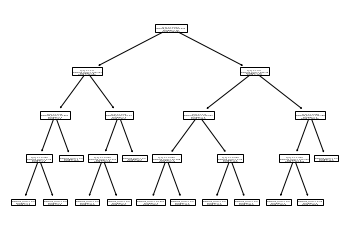

In [17]:
tree.plot_tree(for_tree_view)

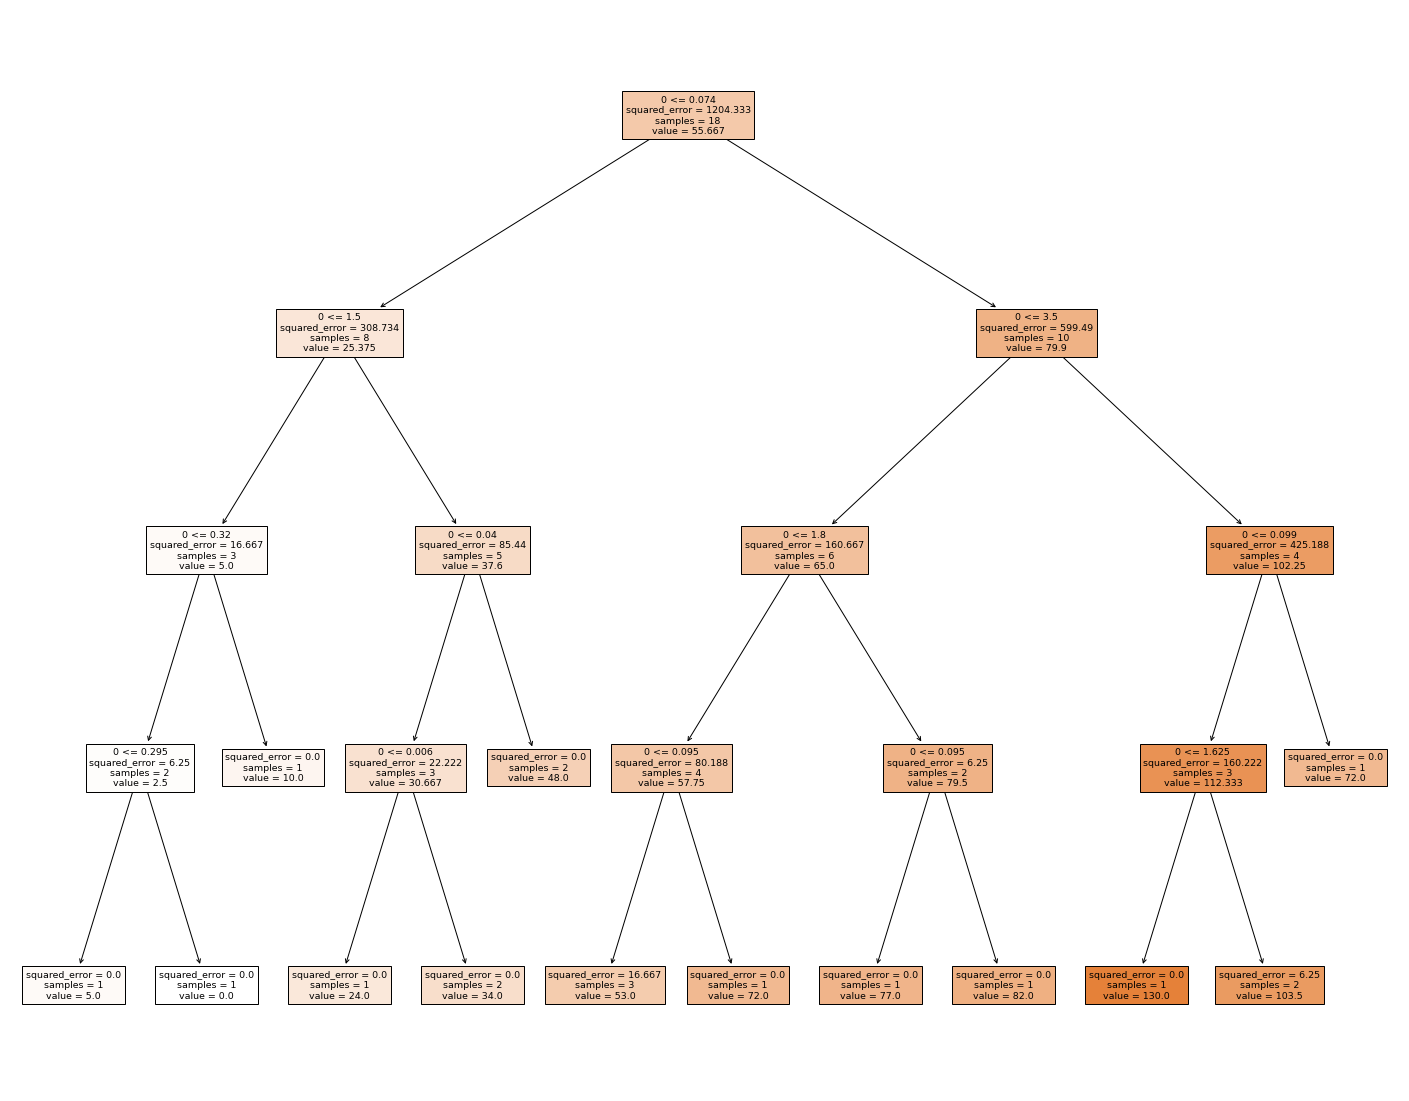

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(for_tree_view, feature_names=df2.Hours, filled=True)

In [19]:
%pip install -q dtreeviz

Note: you may need to restart the kernel to use updated packages.


In [20]:
from dtreeviz.trees import *

In [48]:
viz = dtreeviz(regressor,
            x_train,
            y_train,
            target_name="Hours",
            orientation='LR',
            feature_names= ["Length", "Weight", "Larvalstage"],
            X=[1.6,0.014,3],
            show_just_path=True,
            colors={'highlight': 'RED'})

/Users/mohitjain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


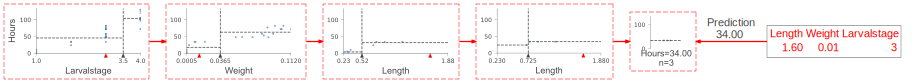

In [49]:
viz

In [23]:
viz.save("tree_view.svg")

In [24]:
%pip install -q pydotplus

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [50]:
from pickle import REDUCE


viz1 = dtreeviz(regressor,
            x_train,
            y_train,
            target_name="Hours",
            orientation='TD',
            feature_names= ["Length", "Weight", "Larvalstage"],
            X=[1.6,0.014,3],
            colors={'highlight': 'RED'})

/Users/mohitjain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


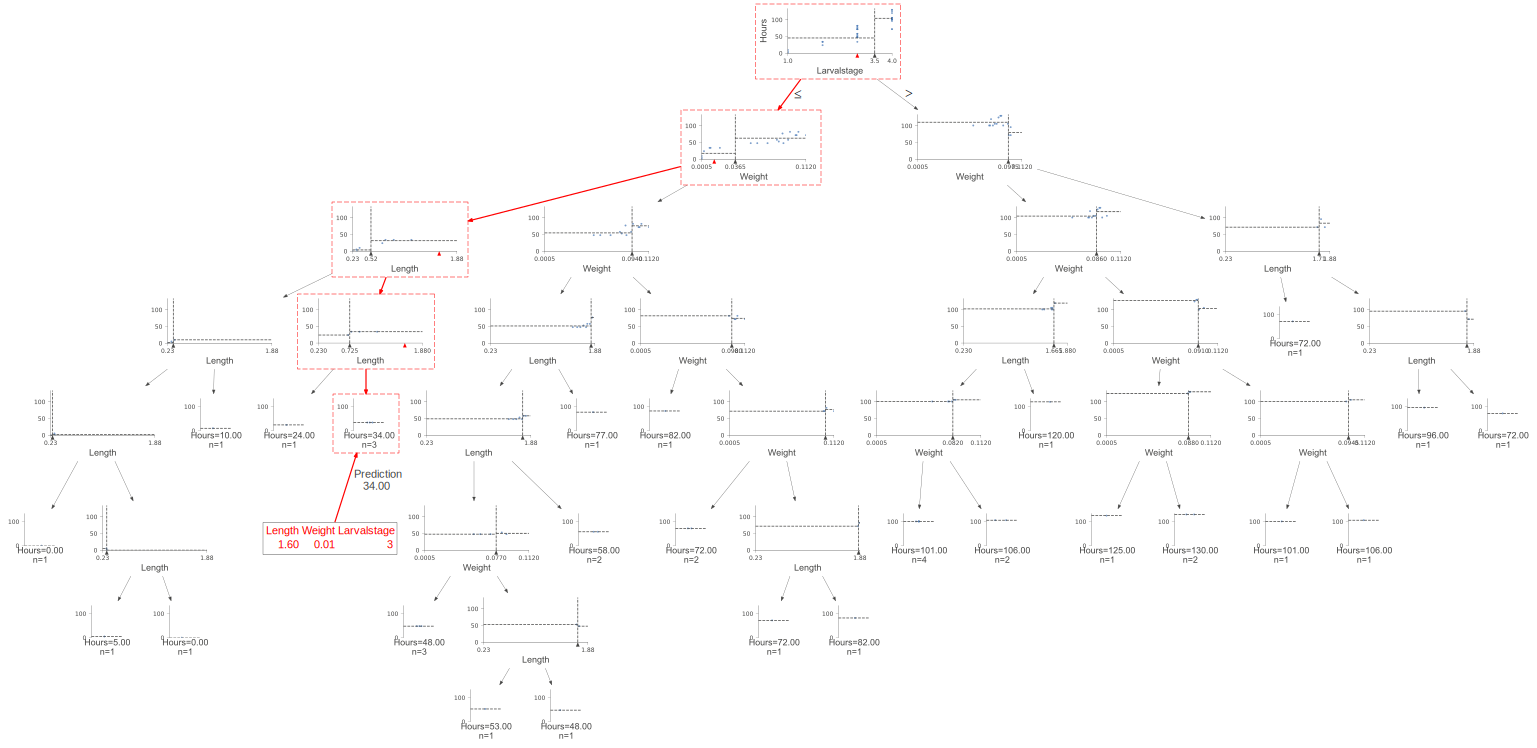

In [51]:
viz1

##### Prediction of age

In [ ]:
x_test.iloc[-1, :]

Length         1.640
Weight         0.085
Larvalstage    4.000
Name: 144, dtype: float64

In [ ]:

z = x_test.values
pred_v = regressor.predict(z)
pred_v

/Users/mohitjain/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([ 72. , 125. ,   2.5,  48. , 120. ,  72. , 101. ,  82. ,  72. ,
        72. ,  72. ,  48. , 106. , 101. ,  72. ,  10. , 106. ,  10. ,
        77. ,  34. ,  72. ,  24. ,  72. ,  72. ,  34. ,   0. ,  48. ,
        72. ,  48. , 101. ,  72. ,  48. ,  10. , 130. , 101. ,  96. ,
       101. , 101. ,  72. ,  72. ,  10. , 101. , 125. ,  72. ,  34. ,
        96. , 120. ,  72. ,   0. ,  24. ,  10. , 125. ,  24. ,  34. ,
       106. , 125. ,   5. ,   2.5,  72. ,  48. ,  48. ,  72. ,  34. ,
       130. ,  58. , 120. ,  72. ,  34. ,  34. ,  58. ,  34. ,  10. ,
        34. ,  10. ,   5. ,  72. ,   5. ,  10. ,  34. ,  58. ,  77. ,
        48. , 120. ,  72. ,   5. ,  24. ,  72. ,  10. ,  96. , 101. ,
        24. , 120. , 125. ,  34. , 120. , 106. , 101. ,  58. ,   5. ,
        24. ,  34. ,  34. ,  34. ,  72. , 101. , 125. ,   5. ,  72. ,
        72. ,  72. ,  48. ,   0. ,  72. ,  77. ,  34. ,  72. ,   0. ,
        48. ,  96. ,  48. ,  72. , 125. ,  77. ,  34. ,  53. , 106. ,
       101. ,  24. ,

In [ ]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test.values)

array([  0,   5,  10,  24,  29,  34,  48,  53,  58,  72,  77,  82,  96,
       101, 106, 120, 125, 130])

In [ ]:
import plotly.express as px

In [ ]:
px.scatter_3d(df2, x='Length', y='Weight', z='Larvalstage')

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
n = len(pred_v)
rmse_lr = np.linalg.norm(pred_v - y_test) / np.sqrt(n)
print(rmse_lr)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
X=sc_x.fit_transform(x.values)
y=sc_y.fit_transform(y.values)

y_actual=sc_y.inverse_transform(pred_v)